In [5]:
# In this line , We have imported all the packages that will be required further.

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import cv2
from scipy import ndimage, misc
from sklearn.datasets import fetch_mldata
from PIL import Image

In [6]:
# This is about getting the current directory path. 
# So, we are not required to chnage the path for dataset. It will automatically take the path for dataset.
path = os.getcwd() + "\\dataset_USF_Random"

In [7]:
# In this line of code, It will read the Images file from dataset and will resize each image file.
# For resizing the image file, we are considering converting to 784 pixels each file, so that we can reduce the computation time.

images = []
for root, dirnames, filenames in os.walk(path):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="1")
        image_resized = misc.imresize(image, (28,28))
        image_resized = np.reshape(image_resized, (np.product(image_resized.shape)))
        images.append(image_resized) 

C:\Users\asus\Anaconda3\Lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
C:\Users\asus\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


In [8]:
# To check the image size
images[1].shape

(784,)

In [11]:
# For counting total number of Images in Folder
count = 0
for i in images:
    count+=1

In [12]:
count

263

In [13]:
# TO storing the images pixels in a list and then converting the list into array.
Xlist=[]
for i in range(count):
    Xlist.append(list(np.asarray(images[i])))

In [14]:
X = np.asarray(Xlist)

In [17]:
# It will automatically read the path of CSV file.

csv_path = os.getcwd() + "\\dataset_USF_Random.csv"
csv = pd.read_csv(csv_path)

In [18]:
# It will take each image file's label(USF / Non USF) and store into a List.

y = []
for i in range(count):
    x =csv['Label'][i]
    y.append(x)

In [19]:
# It will convert the list into array.
y = np.asarray(y)

In [20]:
# To check the type of X and Y.

type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [21]:
# To check the shape of X & Y.

X.shape,y.shape

((263, 784), (263,))

In [22]:
# To divide the dataset into train and test.
# For testing we have taken 20% of data.

test  = int(count*0.2)
test

52

In [23]:
# Dividing the original dataset into training and testing datset.
X_train, X_test, y_train, y_test = X[:count-test], X[count-test:],y[:count-test], y[count-test:]

In [24]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [25]:
X_train.shape,y_train.shape

((211, 784), (211,))

In [26]:
# For shuffling index of train dataset.
shuffle_index = np.random.permutation(count-test)

In [27]:
# Printing shuffle index, length of it and each and every shufle index.
print(type(shuffle_index), len(shuffle_index),shuffle_index)

<class 'numpy.ndarray'> 211 [169 209 110 121  63 168 153 127  50 107 134  53 202 124  30  27  81  96
 145 194  47 119  33   2 154 206  58  80 176  40 152 142 122 163 177 146
   6 102 186 210  12  99 207 106  88 109  28  59  74 180   5 165 160 198
  98  35  56 133  24 108 162 193  91  41 126  52 195  68  19 140  60 188
  92 179 205  73  83 171  14 118 130 113  86  51  32  48 184  22  84 143
  61 156  37 138  13 172  55  67 155  89  87 141  75 148  34 157 147  36
 189   9 100 123  64  97 132  93  38 131 167  69   0 136  85  17  72 103
  95 111 174 204   8 116  94  20 197 199 144 137 173  10  21  70  45  42
 101  66 161  90 115 150   4  25 187  23  29 125  71 191 208 170 139  79
  62  46 196  57  43 105 104 181 117 203 175  82 128   7  54  16  78 120
 135 112   3 200 201 190  77 185  76  44 114  31  26 166  39 151   1 129
 159 192 183 182  18  15 178 158 149  49  65 164  11]


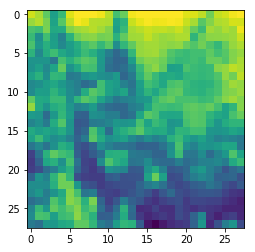

In [28]:
# For showing a single imgae file after reshaping.
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

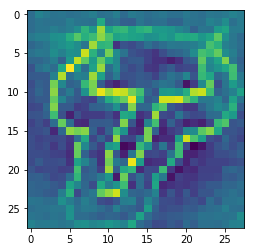

In [29]:
# For shuffling X_Train and Y_Train.
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [30]:
# For importing creating Stochastic Gradient Descent.
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
type(sgd)

sklearn.linear_model.stochastic_gradient.SGDClassifier

In [31]:
y_test[0:10]

array(['Non USF', 'Non USF', 'USF', 'USF', 'USF', 'USF', 'USF', 'USF',
       'USF', 'USF'], dtype='<U7')

In [32]:
# Trying to fit the data with the sgd model and predicting using X_test data..
sgd.fit(X_train, y_train)
prediction = sgd.predict(X_test)

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [33]:
# importing accuracy score
from sklearn.metrics import accuracy_score

In [34]:
# For getting the accuracy from the model.
total =0
total = accuracy_score(y_test, prediction)


In [35]:
print(total)

0.6923076923076923


In [61]:
# For importing cross validation score
from sklearn.model_selection import cross_val_score

In [62]:
# For calculating cross val score by giving CV=3.
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-p

array([0.85915493, 0.84285714, 0.8       ])

In [63]:
# For importing cross validation prediction.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=3)

C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\asus\Anaconda3\Lib\site-p

In [64]:
len(y_train_pred)

211

In [65]:
# For importing  confusion matrix and creating confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred) # actual vs predicted

array([[ 46,  12],
       [ 23, 130]], dtype=int64)